<a href="https://colab.research.google.com/github/khang-nguyen2907/AIP391_Project/blob/main/UNET_Carla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!rm -r data

In [ ]:
!cp -av "/content/drive/MyDrive/Tensorflow_coursera/U_net Segmentation/data" "/content/"

'/content/drive/MyDrive/Tensorflow_coursera/U_net Segmentation/data' -> '/content/data'
'/content/drive/MyDrive/Tensorflow_coursera/U_net Segmentation/data/CameraRGB' -> '/content/data/CameraRGB'
'/content/drive/MyDrive/Tensorflow_coursera/U_net Segmentation/data/CameraRGB/000033.png' -> '/content/data/CameraRGB/000033.png'
'/content/drive/MyDrive/Tensorflow_coursera/U_net Segmentation/data/CameraRGB/000032.png' -> '/content/data/CameraRGB/000032.png'
'/content/drive/MyDrive/Tensorflow_coursera/U_net Segmentation/data/CameraRGB/000029.png' -> '/content/data/CameraRGB/000029.png'
'/content/drive/MyDrive/Tensorflow_coursera/U_net Segmentation/data/CameraRGB/000028.png' -> '/content/data/CameraRGB/000028.png'
'/content/drive/MyDrive/Tensorflow_coursera/U_net Segmentation/data/CameraRGB/000027.png' -> '/content/data/CameraRGB/000027.png'
'/content/drive/MyDrive/Tensorflow_coursera/U_net Segmentation/data/CameraRGB/000026.png' -> '/content/data/CameraRGB/000026.png'
'/content/drive/MyDrive/

In [ ]:
!unzip "/content/drive/MyDrive/Tensorflow_coursera/U_net Segmentation/carla-capture-20180513A.zip" -d "/content/"

Archive:  /content/drive/MyDrive/Tensorflow_coursera/U_net Segmentation/carla-capture-20180513A.zip
   creating: /content/CameraRGB/
 extracting: /content/CameraRGB/F61-1.png  
 extracting: /content/CameraRGB/F61-10.png  
 extracting: /content/CameraRGB/F61-100.png  
 extracting: /content/CameraRGB/F61-11.png  
 extracting: /content/CameraRGB/F61-12.png  
 extracting: /content/CameraRGB/F61-13.png  
 extracting: /content/CameraRGB/F61-14.png  
 extracting: /content/CameraRGB/F61-15.png  
 extracting: /content/CameraRGB/F61-16.png  
 extracting: /content/CameraRGB/F61-17.png  
 extracting: /content/CameraRGB/F61-18.png  
 extracting: /content/CameraRGB/F61-19.png  
 extracting: /content/CameraRGB/F61-2.png  
 extracting: /content/CameraRGB/F61-20.png  
 extracting: /content/CameraRGB/F61-21.png  
 extracting: /content/CameraRGB/F61-22.png  
 extracting: /content/CameraRGB/F61-23.png  
 extracting: /content/CameraRGB/F61-24.png  
 extracting: /content/CameraRGB/F61-25.png  
 extracting: 

In [ ]:
import tensorflow as tf
import numpy as np

from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Conv2DTranspose
from tensorflow.keras.layers import concatenate


#2 - Load and Split the Data

In [ ]:
import os 
import pandas as pd 
import imageio
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
path = ''
image_path = '/content/CameraRGB'
mask_path = '/content/CameraSeg'
image_list = os.listdir(image_path)
mask_list = os.listdir(mask_path)
image_list = [image_path+"/"+i for i in image_list]
mask_list = [mask_path+"/"+i for i in mask_list]

## Check out some of the unmasked and masked images from the dataset: 


Text(0.5, 1.0, 'Segmentation')

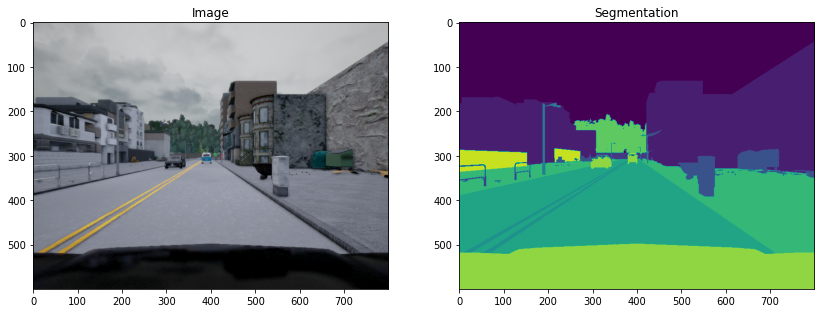

In [ ]:
N = 5
img = imageio.imread(image_list[N])
mask = imageio.imread(mask_list[N])

fig, arr = plt.subplots(1, 2, figsize=(14, 10))
arr[0].imshow(img)
arr[0].set_title('Image')
arr[1].imshow(mask[:,:,0])
arr[1].set_title('Segmentation')

##2.1 - Split your dataset into unmasked and masked images

In [ ]:
"""
Arguments: 
    image_list -- list containing image paths -- ["/content/CameraRGB/F61-1.png", "/content/CameraRGB/F61-10.png", ...]  
    mask_list -- list containing mask paths -- ["/content/CameraRGB/F61-1.png", "/content/CameraRGB/F61-10.png", ...]
Returns: 
    <TensorSliceDataset shapes: (), types: tf.string> #image_list_ds 
    <TensorSliceDataset shapes: (), types: tf.string> #mask_list_ds
"""
image_list_ds = tf.data.Dataset.list_files(image_list, shuffle=False)
mask_list_ds = tf.data.Dataset.list_files(mask_list, shuffle=False)

print(image_list_ds)
print(mask_list_ds)

<TensorSliceDataset shapes: (), types: tf.string>
<TensorSliceDataset shapes: (), types: tf.string>


In [ ]:
for path in zip(image_list_ds.take(3), mask_list_ds.take(3)): 
  print(path)

(<tf.Tensor: shape=(), dtype=string, numpy=b'/content/CameraRGB/F61-1.png'>, <tf.Tensor: shape=(), dtype=string, numpy=b'/content/CameraSeg/F61-1.png'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'/content/CameraRGB/F61-10.png'>, <tf.Tensor: shape=(), dtype=string, numpy=b'/content/CameraSeg/F61-10.png'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'/content/CameraRGB/F61-100.png'>, <tf.Tensor: shape=(), dtype=string, numpy=b'/content/CameraSeg/F61-100.png'>)


In [ ]:
"""
image_filenames Returns: 
    tf.Tensor([b'/content/CameraRGB/F67-59.png' b'/content/CameraRGB/F64-62.png', 
    b'/content/CameraRGB/F63-80.png' b'/content/CameraRGB/F63-86.png', ...])
"""
image_filenames = tf.constant(image_list)
masks_filenames = tf.constant(mask_list)

dataset = tf.data.Dataset.from_tensor_slices((image_filenames, masks_filenames))

for image, mask in dataset.take(1): 
  print(image)
  print(mask)

tf.Tensor(b'/content/CameraRGB/F67-59.png', shape=(), dtype=string)
tf.Tensor(b'/content/CameraSeg/F67-59.png', shape=(), dtype=string)


In [ ]:
print(image_filenames)
print(masks_filenames)

tf.Tensor(
[b'/content/CameraRGB/F67-59.png' b'/content/CameraRGB/F64-62.png'
 b'/content/CameraRGB/F63-80.png' b'/content/CameraRGB/F63-86.png'
 b'/content/CameraRGB/F63-29.png' b'/content/CameraRGB/F67-49.png'
 b'/content/CameraRGB/F70-27.png' b'/content/CameraRGB/F66-98.png'
 b'/content/CameraRGB/F63-77.png' b'/content/CameraRGB/F63-10.png'
 b'/content/CameraRGB/F67-2.png' b'/content/CameraRGB/F69-47.png'
 b'/content/CameraRGB/F69-42.png' b'/content/CameraRGB/F65-36.png'
 b'/content/CameraRGB/F65-64.png' b'/content/CameraRGB/F64-52.png'
 b'/content/CameraRGB/F62-22.png' b'/content/CameraRGB/F64-47.png'
 b'/content/CameraRGB/F64-58.png' b'/content/CameraRGB/F67-1.png'
 b'/content/CameraRGB/F70-98.png' b'/content/CameraRGB/F65-8.png'
 b'/content/CameraRGB/F65-31.png' b'/content/CameraRGB/F64-76.png'
 b'/content/CameraRGB/F61-68.png' b'/content/CameraRGB/F64-92.png'
 b'/content/CameraRGB/F70-12.png' b'/content/CameraRGB/F63-22.png'
 b'/content/CameraRGB/F68-85.png' b'/content/CameraRGB

##2.2 - Preprocess data

In [ ]:
def process_path(image_path, mask_path): 
  img = tf.io.read_file(image_path)
  img = tf.image.decode_png(img, channels= 3)
  img = tf.image.convert_image_dtype(img, tf.float32) #/255

  mask = tf.io.read_file(mask_path)
  mask = tf.image.decode_png(mask, channels= 3)
  mask = tf.math.reduce_max(mask, axis = -1, keepdims=True)
  return img, mask

def preprocess(image, mask): 
  input_image = tf.image.resize(image, (96, 128), method = 'nearest')
  input_mask = tf.image.resize(mask, (96, 128), method = 'nearest')

  return input_image, input_mask

image_ds = dataset.map(process_path)
processed_image_ds = image_ds.map(preprocess)

tf.Tensor(
[[[0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  ...
  [0.         0.0509804  0.        ]
  [0.         0.0509804  0.        ]
  [0.0509804  0.08627451 0.0509804 ]]

 [[0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  ...
  [0.         0.0509804  0.        ]
  [0.         0.0509804  0.        ]
  [0.0509804  0.08627451 0.        ]]

 [[0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  ...
  [0.0509804  0.08627451 0.        ]
  [0.         0.08627451 0.        ]
  [0.         0.0509804  0.        ]]

 ...

 [[0.0509804  0.0509804  0.        ]
  [0.0509804  0.         0.        ]
  [0.0509804  0.0509804  0.        ]
  ...
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]]

 [[0.0509804  0.0509804  0.        ]
  [0.0509804  0.0509804  0

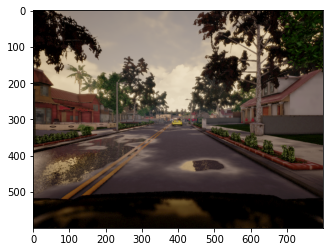

In [ ]:
"""
tf.io.read_file: read the contents of a file

Returns: 
    a tensor with the entire contents of the input filename, in case file is an image, it returns codes that can not understand

tf.image.decode_png(): 

Returns: 
  tf.Tensor([[[0 0 0]
              [0 0 0]
              [0 0 0]
              ...
              [0 13 0]
              [0 13 0]
              [13 22 13]
              ...]])

tf.image.convert_image_dtype: 

Returns: 
    tf.Tensor([[[0 0 0]
              [0 0 0]
              [0 0 0]
              ...
              [0 13/255 0]
              [0 13/255 0]
              [13/255 22/255 13/255]
              ...]])

Inference: The image shown through plt.imshow is the same with normalized image (/255) and non-normalized image 
"""
pimg = tf.io.read_file("/content/CameraRGB/F61-1.png")
pimg = tf.image.decode_png(pimg, channels=3)
pimg = tf.image.convert_image_dtype(pimg, tf.float32)
print(pimg)
plt.imshow(pimg)

#Find out number of classes 

In [ ]:
s = set()

In [ ]:
for image, mask in processed_image_ds.take(len(processed_image_ds)): 
  mask =mask.numpy()
  for i in range(mask.shape[0]): 
    for j in range(mask.shape[1]): 
      for k in range(mask.shape[2]): 
        s.add(mask[i][j][k])

In [ ]:
print("number of classes: ", len(s))

number of classes:  13


#3 - U-Net

In [ ]:
def conv_block(inputs = None, n_filters = 32, dropout_prob = 0, max_pooling = True): 
  """
  Convolutional downsampling block 

  Arguments: 
    inputs -- Input tensor
    n_filters -- number of filters for the convolutional layers
    dropout_prob -- Dropout probability 
    max_pooling -- use MaxPooling2D to reduce the spatial dimensions of the output volume
  Returns: 
    next_layer, skip_connection -- next layer and skip connection outputs 
  """
  conv = Conv2D(
      n_filters, 
      3, #kernel size
      activation= 'relu', 
      padding='same', 
      kernel_initializer = 'he_normal'
  )(inputs)
  
  conv = Conv2D(
      n_filters, 
      3, 
      activation = 'relu', 
      padding = 'same', 
      kernel_initializer = 'he_normal'
  )(conv)

  if dropout_prob > 0: 
    conv = Dropout(dropout_prob)(conv)
  
  if max_pooling: 
    next_layer = MaxPooling2D(pool_size = (2,2))(conv)
  else: 
    next_layer = conv
  
  skip_connection = conv

  return next_layer, skip_connection

In [ ]:
def upsampling_block(expansive_input, contractive_input, n_filters = 32): 
  """
  Convolutional upsampling block

  Arguments: 
    expansive_input -- Input tensor from previous layer 
    contractive_input -- Input tensor from previous skip layer
    n_filters -- number of filters for the convolutional layers 
  Returns: 
    conv -- tensor output
  """
  up = Conv2DTranspose(
      n_filters, 
      3, 
      strides=(2,2), 
      padding = 'same'
  )(expansive_input)

  merge = concatenate([up, contractive_input], axis = 3)
  conv = Conv2D(
      n_filters, 
      3, 
      activation = 'relu', 
      padding = 'same', 
      kernel_initializer = 'he_normal'
  )(merge)
  
  conv = Conv2D(
      n_filters, 
      3, 
      activation='relu', 
      padding = 'same', 
      kernel_initializer = 'he_normal'
  )(conv)

  return conv

In [ ]:
def unet_model(input_size = (96,128,3), n_filters = 32, n_classes = 13): 
  """
  Unet model

  Arguments: 
      input_size -- Input shape
      n_filters -- Number of filters for the convolutional layers 
      n_classes -- number of output classes 
  Returns: 
      model -- tf.keras.Model
  """
  inputs = Input(input_size)
  #Contracting Path (encoding)
  #Add a conv_block with the inputs of the unet_model and n_filters
  #Recall: conv_block(inputs = None, n_filters = 32, dropout_prob = 0, max_pooling = True)
  cblock1 = conv_block(inputs, n_filters= n_filters)
  cblock2 = conv_block(cblock1[0], n_filters=n_filters*2)
  cblock3 = conv_block(cblock2[0], n_filters=n_filters*4)
  cblock4 = conv_block(cblock3[0], n_filters=n_filters*8, dropout_prob=0.3)
  cblock5 = conv_block(cblock4[0], n_filters=n_filters*16, dropout_prob=0.3, max_pooling=False)

  #Expanding path (decoding)
  ublock6 = upsampling_block(cblock5[0], cblock4[1], n_filters=n_filters*8)
  ublock7 = upsampling_block(ublock6, cblock3[1], n_filters = n_filters*4)
  ublock8 = upsampling_block(ublock7, cblock2[1], n_filters= n_filters*2)
  ublock9 = upsampling_block(ublock8, cblock1[1], n_filters=n_filters)

  conv9 = Conv2D(
      n_filters, 
      3, 
      activation = 'relu', 
      padding= 'same', 
      kernel_initializer = 'he_normal'
  )(ublock9)

  conv10 = Conv2D(
      n_classes, 
      1, 
      padding = 'same'
  )(conv9)

  model = tf.keras.Model(inputs = inputs, outputs = conv10)
  
  return model

In [ ]:
H = 96 
W = 128 
C = 3

unet = unet_model((H, W, C))

In [ ]:
unet.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 96, 128, 3)  0           []                               
                                ]                                                                 
                                                                                                  
 conv2d (Conv2D)                (None, 96, 128, 32)  896         ['input_1[0][0]']                
                                                                                                  
 conv2d_1 (Conv2D)              (None, 96, 128, 32)  9248        ['conv2d[0][0]']                 
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 48, 64, 32)   0           ['conv2d_1[0][0]']           

In [ ]:
unet.compile(optimizer = 'adam', 
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
             metrics = ['accuracy'])

In [ ]:
def display(display_list): 
  plt.figure(figsize=(15,15))

  title = ['Input Image', 'True Mask', 'Predicted Mask']

  for i in range(len(display_list)): 
    plt.subplot(1, len(display_list), i+1)
    plt.title(title[i])
    plt.imshow(tf.keras.preprocessing.image.array_to_img(display_list[i]))
    plt.axis('off')
  plt.show()

(600, 800, 1)


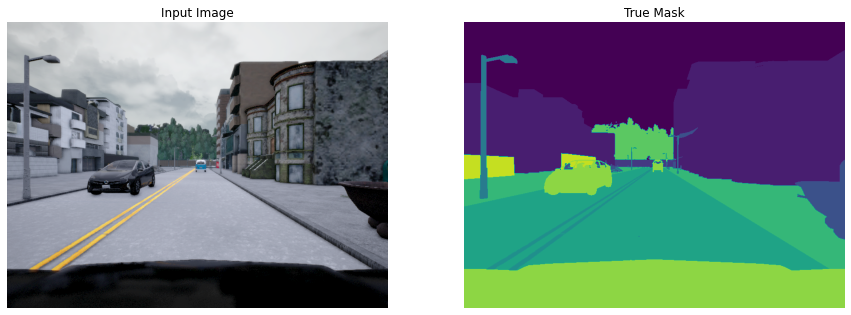

In [ ]:
#image_ds = dataset.map(process_path)
for image, mask in image_ds.take(1): 
  sample_image, sample_mask = image, mask
  print(mask.shape)

display([sample_image, sample_mask])

(96, 128, 1)


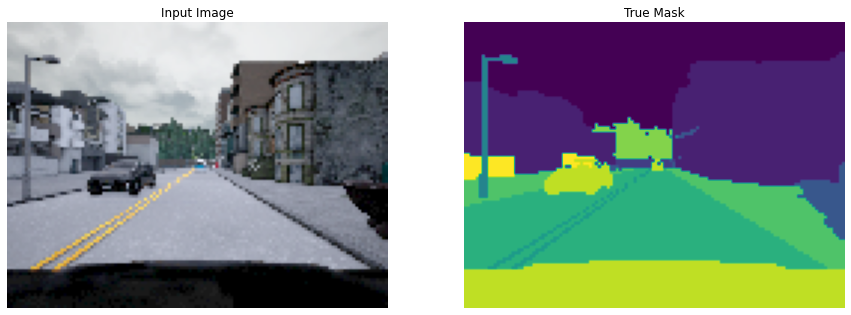

In [ ]:
for image, mask in processed_image_ds.take(1): 
  sample_image, sample_mask = image, mask
  print(mask.shape)

display([sample_image, sample_mask])

#Train the Model

In [ ]:
EPOCHS = 40
VAL_SUBPLITS = 5
BUFFER_SIZE = 500
BATCH_SIZE = 32
processed_image_ds.batch(BATCH_SIZE)
train_dataset = processed_image_ds.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
print(processed_image_ds.element_spec)
model_history = unet.fit(train_dataset, epochs = EPOCHS)

(TensorSpec(shape=(96, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(96, 128, 1), dtype=tf.uint8, name=None))
Epoch 1/40
32/32 [==============================] - 29s 316ms/step - loss: 1.7953 - accuracy: 0.4170
Epoch 2/40
32/32 [==============================] - 2s 71ms/step - loss: 0.8939 - accuracy: 0.7315
Epoch 3/40
32/32 [==============================] - 2s 71ms/step - loss: 0.6176 - accuracy: 0.8148
Epoch 4/40
32/32 [==============================] - 2s 71ms/step - loss: 0.4695 - accuracy: 0.8529
Epoch 5/40
32/32 [==============================] - 2s 70ms/step - loss: 0.4815 - accuracy: 0.8494
Epoch 6/40
32/32 [==============================] - 2s 71ms/step - loss: 0.3520 - accuracy: 0.8901
Epoch 7/40
32/32 [==============================] - 2s 71ms/step - loss: 0.2892 - accuracy: 0.9089
Epoch 8/40
32/32 [==============================] - 2s 71ms/step - loss: 0.2531 - accuracy: 0.9198
Epoch 9/40
32/32 [==============================] - 2s 71ms/step - loss: 0.2321 - acc

##4.1 - Create predicted masks

In [ ]:
def create_mask(pred_mask): 
  pred_mask = tf.argmax(pred_mask, axis= -1)
  pred_mask = pred_mask[...,tf.newaxis]
  return pred_mask[0]

#4.2 - Plot Model Accuracy

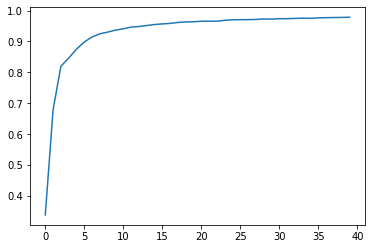

In [ ]:
plt.plot(model_history.history["accuracy"])

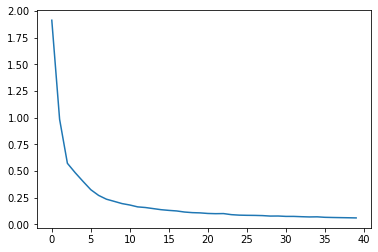

In [ ]:
plt.plot(model_history.history["loss"])

#4.3 - Show predictions 

In [ ]:
def show_predictions(dataset=None, num =1): 
  """
  Display the first image of each of the num batches 

  Arguments: 
      image -- tf.Tensor(array (matrix number)) -- (32, 96, 128, 3) -- batch_size = 32, img shape = (96, 128,3)
      mask -- tf.Tensor(array (matrix number)) -- (32, 96, 128, 1) -- ...
      train_dataset is created by processed_image_ds
      processed_image_ds -- tf.Tensor(array (normalized matrix number))

  Inference: 
      In order to be a legal parameter of "predict" function from "unet.predict()", image need to be a tf.Tensor(array)
      (batchsize, H, W, C)

      Transform normal image (H, W,C) to (1, H, W, C) by image[tf.newaxis, ...] -- unet.predict(sample_image[tf.newaxis, ...])
  """
  if dataset: 
    for image, mask in dataset.take(num): 
      pred_mask = unet.predict(image)
      display([image[0], mask[0], create_mask(pred_mask)])
  else: 
    display([sample_image, sample_mask, create_mask(unet.predict(sample_image[tf.newaxis, ...]))])

In [ ]:
# train_dataset
# for image, mask in train_dataset.take(1): 
#   pm = unet.predict(image)
#   print(pm.shape)
"""
train_dataset is defined as a set of 32-batch-image
"""
it, mt = None, None
for i, j in train_dataset.take(1): 
  it = i
  mt = j
print(it.shape)
print(mt.shape)

(32, 96, 128, 3)
(32, 96, 128, 1)


In [ ]:
pm = unet.predict(it)
print(pm.shape)
pm1 = tf.argmax(pm, axis = -1)
print(pm1.shape)
pm2 = pm1[...,tf.newaxis]
print(pm2.shape)

(32, 96, 128, 13)
(32, 96, 128)
(32, 96, 128, 1)


In [ ]:
pm1[0]

<tf.Tensor: shape=(96, 128), dtype=int64, numpy=
array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  9],
       [ 9,  0,  0, ...,  0,  9,  9],
       ...,
       [10, 10, 10, ..., 10, 10, 10],
       [10, 10, 10, ..., 10, 10, 10],
       [10, 10, 10, ..., 10, 10, 10]])>

In [ ]:
plt.imshow(tf.keras.preprocessing.image.array_to_img(pm[0]))

ValueError: ignored

In [ ]:
# dataset 
for image, mask in dataset.take(1): 
  print(image)
  print(mask)

tf.Tensor(b'/content/CameraRGB/F67-59.png', shape=(), dtype=string)
tf.Tensor(b'/content/CameraSeg/F67-59.png', shape=(), dtype=string)


In [ ]:
# processed_image_ds 
for image, mask in processed_image_ds.take(1): 
  print(image)
  # print(mask.shape)

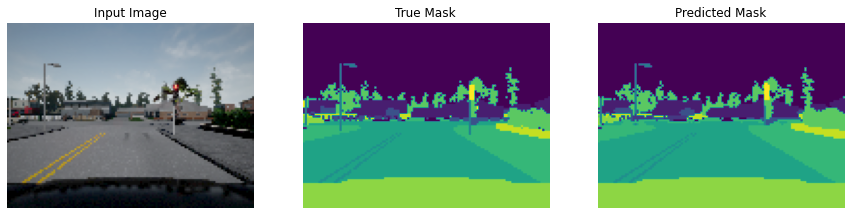

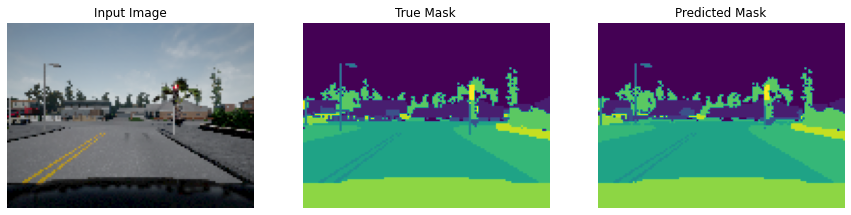

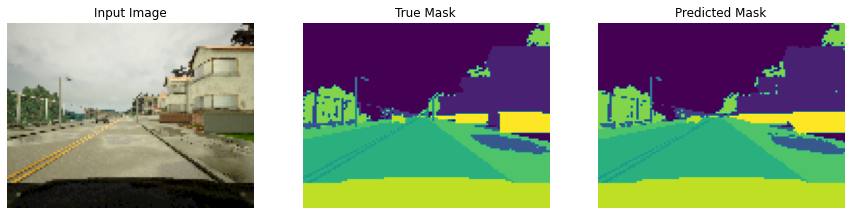

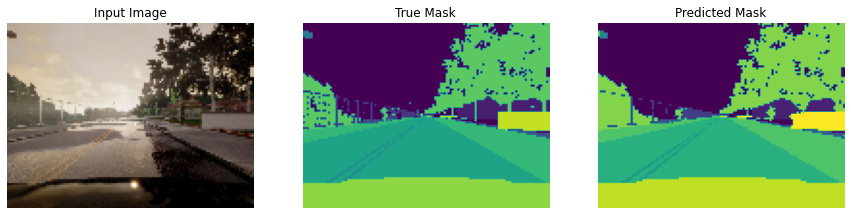

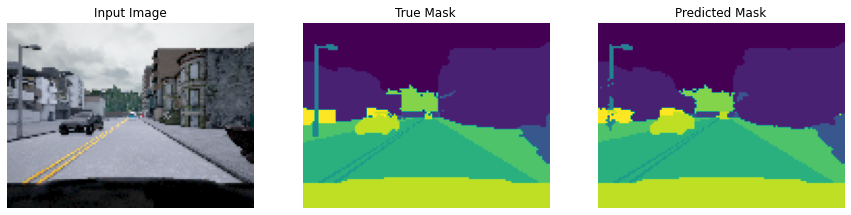

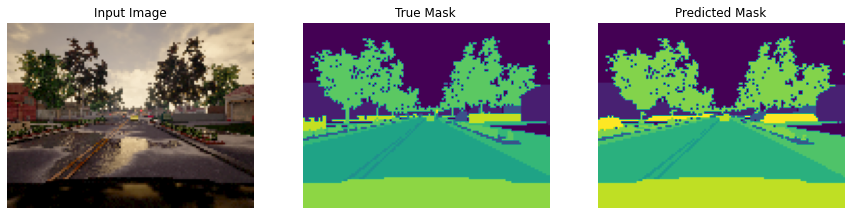

In [ ]:
show_predictions(train_dataset, 6)

In [ ]:
from PIL import Image

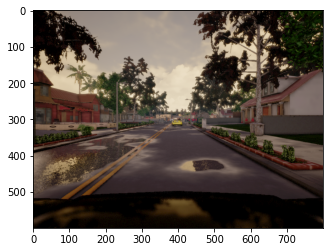

In [ ]:
img = Image.open("/content/CameraRGB/F61-1.png")
plt.imshow(img)

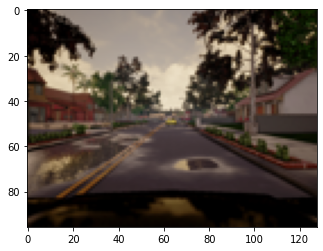

In [ ]:
img = img.resize((128,96))
plt.imshow(img)

In [ ]:
seg = unet.predict(img)

ValueError: ignored